<a href="https://colab.research.google.com/github/MohammadJavadN/Ball-Wall/blob/main/HW_NN_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align=center>

<font size=5>
    In the Name of God
<font/>
<br/>
<br/>
<font>
    Sharif University of Technology - Departmenet of Electrical Engineering
</font>
<br/>
<font>
    Introducing with Machine Learing - Dr. S. Amini
</font>
<br/>
<br/>
Spring 2023

</div>

<hr/>
<div align=center>
<font size=6>
    Neural Networks Practical Assignment
    
    Question 2
</font>
<br/>		
<font size=4>
<br/>
</div>

# Personal Data

In [1]:
# Set your student number
student_number = 99102434
Name = 'Mohammad Javad'
Last_Name = 'Noroozi'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.  

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- In this question, you are allowed to use `torch.optim`, `torch.nn` or any other submodule you need.
- You **are not allowed** to use the models already implemented or the pretrained models in torch. 

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install torchvision
!pip install torch

## Importing Libraries

In [2]:
import torch
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader

import numpy as np
from matplotlib import pyplot as plt
from typing import Dict

## Datasets and Dataloaders

You should load the train and test set of the `CIFAR10` dataset and apply the desired transforms on it. Then, you should create the loaders for these `test` and `train` sets.
- **Hint:** You can use `torchvision.datasets` to easily load the CIFAR10 dataset.

In [3]:
## FILL HERE
import torchvision #todo: remove import
transform = transforms.Compose([
    transforms.ToTensor()
])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

trainloader = DataLoader(train_set, batch_size=64, shuffle=True)
testloader = DataLoader(test_set, batch_size=64, shuffle=False)

classes = train_set.classes # for latest cell

100%|██████████| 170498071/170498071 [00:04<00:00, 38756667.39it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


## Visualization

Visualize 1 random image from each class


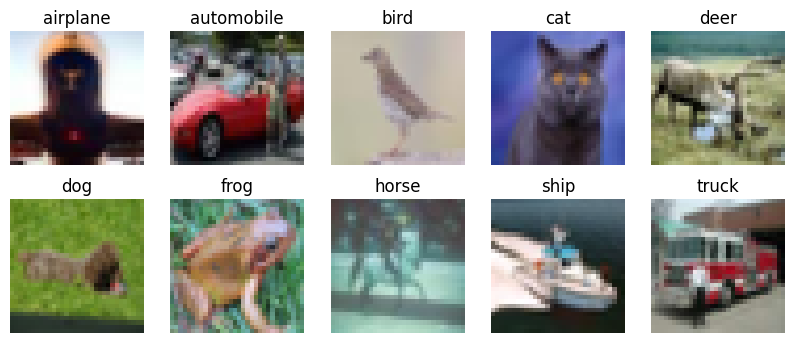

In [4]:
## FILL HERE
class_names = train_set.classes

class_images = {}
for class_name in class_names:
  class_images[class_name] = None

for images, labels in trainloader:
  for i in range(len(labels)):
    class_index = labels[i].item()
    if class_images[class_names[class_index]] is None:
      class_images[class_names[class_index]] = images[i]
      if all([v is not None for v in class_images.values()]):
        break
  if all([v is not None for v in class_images.values()]):
    break
fig, axs = plt.subplots(2, 5, figsize=(10, 4))
for i in range(len(class_names)):
  axs[divmod(i, 5)].imshow(class_images[class_names[i]].permute(1, 2, 0))
  axs[divmod(i, 5)].set_title(class_names[i])
  axs[divmod(i, 5)].axis('off')
plt.show()

## Defining a Convolutional Neural Network

In this section, you should define a class called `Net` which represents the model for your convolutional neural network.
- **Hint:** You can use `torch.nn` to add the required layers to your model.

In [5]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        ## FILL HERE
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(in_features=64 * 8 * 8, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=10)

    def forward(self, x):
        ## FILL HERE
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()

## Define a Loss function and optimizer

In this section, you simply define your loss function and optimizer.
- **Hint:** You can use `torch.optim` and implemented loss functions in torch.

In [6]:
## FILL HERE
lossFunc = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

## Training the model

You should train your model for multiple epochs. You are free to choose the number of epochs. However, you should reach an acceptable accuracy at the end.

In [7]:
epoch_nums = 10 ## Number of epochs
for epoch in range(epoch_nums):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        ## FILL HERE
        ## You should train the model and also print the running loss for each batch
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = lossFunc(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() # todo
        if i % 100 == 99: 
          print(f'Epoch [{epoch + 1}, Batch {i + 1:5d}]: Loss = {running_loss / 100:.4f}')
          running_loss = 0.0
print('Finished Training')

Epoch [1, Batch   100]: Loss = 2.0054
Epoch [1, Batch   200]: Loss = 1.6342
Epoch [1, Batch   300]: Loss = 1.5205
Epoch [1, Batch   400]: Loss = 1.4439
Epoch [1, Batch   500]: Loss = 1.3645
Epoch [1, Batch   600]: Loss = 1.2934
Epoch [1, Batch   700]: Loss = 1.2551
Epoch [2, Batch   100]: Loss = 1.1638
Epoch [2, Batch   200]: Loss = 1.1091
Epoch [2, Batch   300]: Loss = 1.1080
Epoch [2, Batch   400]: Loss = 1.0689
Epoch [2, Batch   500]: Loss = 1.0471
Epoch [2, Batch   600]: Loss = 1.0145
Epoch [2, Batch   700]: Loss = 1.0305
Epoch [3, Batch   100]: Loss = 0.9271
Epoch [3, Batch   200]: Loss = 0.9482
Epoch [3, Batch   300]: Loss = 0.9238
Epoch [3, Batch   400]: Loss = 0.8901
Epoch [3, Batch   500]: Loss = 0.8937
Epoch [3, Batch   600]: Loss = 0.9039
Epoch [3, Batch   700]: Loss = 0.8794
Epoch [4, Batch   100]: Loss = 0.7903
Epoch [4, Batch   200]: Loss = 0.8113
Epoch [4, Batch   300]: Loss = 0.7882
Epoch [4, Batch   400]: Loss = 0.7981
Epoch [4, Batch   500]: Loss = 0.7812
Epoch [4, Ba

## Test the network on the test data

In the following section, you should test your network and calculate the accuracy of your model on the test dataset.

In [9]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        ## FILL HERE
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 69 %


Here, we also calculate the model performance for each class as well.

In [10]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        ## FILL HERE
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        for label, prediction in zip(labels, predicted):
            classname = classes[label]
            if prediction == label:
                correct_pred[classname] += 1
            total_pred[classname] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: airplane is 75.1 %
Accuracy for class: automobile is 77.7 %
Accuracy for class: bird  is 70.8 %
Accuracy for class: cat   is 45.6 %
Accuracy for class: deer  is 51.9 %
Accuracy for class: dog   is 60.0 %
Accuracy for class: frog  is 82.6 %
Accuracy for class: horse is 75.4 %
Accuracy for class: ship  is 84.3 %
Accuracy for class: truck is 76.4 %
